In [2]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
test=X_test.copy()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


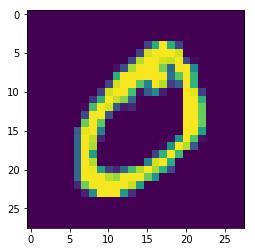

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
#print(y_train[:10])
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
from keras.layers import Activation
#from keras import regularizers
from keras.regularizers import l2
from keras.layers import Conv2D


model = Sequential()
 

model.add(Conv2D(16, (3, 3), input_shape=(28,28,1)))                            #26x26x16 removed activation
model.add(BatchNormalization())  
model.add(Activation('relu'))                                                   #added activation
model.add(Dropout(0.1))
#model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))   #26
#model.add(BatchNormalization())
#model.add(Dropout(0.1))



model.add(Conv2D(32, (3, 3),kernel_regularizer=l2(0.001)))                      #24x24x32 removed activation, added L2 regularizer
model.add(BatchNormalization())
model.add(Activation('relu'))                                                   #added activation
model.add(Dropout(0.1))
#model.add(Convolution2D(32, 3, 3, activation='relu')) #24
#model.add(BatchNormalization())
#model.add(Dropout(0.1))


model.add(Conv2D(10, (1, 1), activation='relu'))                                #22X22X10

model.add(MaxPooling2D(pool_size=(2, 2)))                                       #11X11X10


model.add(Conv2D(16, (3, 3), kernel_regularizer=l2(0.001)))                     #9x9x16 removed activation, added L2 regularizer
model.add(BatchNormalization())
model.add(Activation('relu'))                                                   #added activation
model.add(Dropout(0.1))
#model.add(Convolution2D(16, 3, 3, activation='relu'))#9
#model.add(BatchNormalization())
#model.add(Dropout(0.1))


model.add(Conv2D(16, (3, 3), kernel_regularizer=l2(0.001)))                     #7x7x16 removed activation, added L2 regularizer
model.add(BatchNormalization())
model.add(Activation('relu'))                                                   #added activation
model.add(Dropout(0.1))
#model.add(Convolution2D(16, 3, 3, activation='relu'))#7
#model.add(BatchNormalization())
#model.add(Dropout(0.1))


model.add(Conv2D(16, (3, 3), kernel_regularizer=l2(0.001)))                     #5x5x16 removed activation, added L2 regularizer
model.add(BatchNormalization())
model.add(Activation('relu'))                                                   #added activation
model.add(Dropout(0.1))
#model.add(Convolution2D(16, 3, 3, activation='relu'))#5
#model.add(BatchNormalization())
#model.add(Dropout(0.1))


model.add(Conv2D(16, (3, 3), kernel_regularizer=l2(0.001)))                     #3x3x16 removed activation, added L2 regularizer
model.add(BatchNormalization())
model.add(Activation('relu'))                                                   #added activation
model.add(Dropout(0.1))
#model.add(Convolution2D(16, 3, 3, activation='relu'))#3
#model.add(BatchNormalization())
#model.add(Dropout(0.1))



model.add(Conv2D(10, (4, 4), kernel_regularizer=l2(0.001)))                     #4x4x10, added L2 regularizer
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()


#model.add(Conv2D(kernel_regularizer=l2(0.0001))) #Every layer?
#model.add(Conv2D(32, (3,3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2

In this model, activation is done after BN, i.e. Conv2D followed by Batch Normalization and activation by 'Relu', finally with Dropout. This is applied for all blocks.<br/>
Second modification is adding L2 Kernel Regularizer. This applied to all Conv2D with a value of 0.01, except for first layer.<br/><br/>


In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [0]:
#import image data generator
from keras.preprocessing.image import ImageDataGenerator

#Image augmentation
datagen = ImageDataGenerator(rotation_range=2,
                             zoom_range = 0.10,
                             width_shift_range=0.2,
                             height_shift_range=0.2)

datagen.fit(X_train)

Added image agumentation. Used standard agumentation; rotation of image by 2degrees, zoom the image by 0.1, shift horizontally by 0.2 and vertical shift by 0.2.<br/>

In [0]:
from keras.callbacks import ModelCheckpoint
# checkpoint
#filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
filepath="weights_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint, LearningRateScheduler(scheduler, verbose=1)]

Implemented checkpoint to model to save best of validation accuracy. Will be overwriting on same file than create new file everytime. Call back oncludes learning rate scheduler and checkpoint. <br/>

In [14]:

#model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
#model.fit_generator(datagen.flow(X_train, Y_train, batch_size=128), steps_per_epoch=len(X_train)/16, nb_epoch=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])


model.fit_generator(datagen.flow(X_train, Y_train, batch_size=128), steps_per_epoch=len(X_train)/16, nb_epoch=40, verbose=1, validation_data=(X_test, Y_test), callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=3750.0, verbose=1, validation_data=(array([[[..., callbacks=[<keras.ca..., epochs=40)`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
3750/3750 [==============================] - 125s 33ms/step - loss: 0.4603 - acc: 0.8796 - val_loss: 0.2365 - val_acc: 0.9596

Epoch 00001: val_acc improved from -inf to 0.95960, saving model to weights_best.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
3750/3750 [==============================] - 119s 32ms/step - loss: 0.2841 - acc: 0.9284 - val_loss: 0.1222 - val_acc: 0.9868

Epoch 00002: val_acc improved from 0.95960 to 0.98680, saving model to weights_best.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
3750/3750 [==============================] - 120s 32ms/step - loss: 0.2559 - acc: 0.9335 - val_loss: 0.1194 - val_acc: 0.9847

Epoch 00003: val_acc did not improve from 0.98680
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
3750/3750 [==============================] - 119s 32ms/st

Executing the model with Batch size of 128, Epoch of 40, incorporating, Image Augumentation, Callback with Check point and LR scheduler.<br/>
Val_accuracy peaked at 99.41%.

---



In [15]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.04737896465063095, 0.9924]


In [16]:
#Predict classes using test data
#predicted = model.predict(X_test)   #predicting the values
predicted = model.predict_classes(X_test)  #predicting the classes

print(predicted)

[7 2 1 ... 4 5 6]


Predicting the classes of X_test.

In [17]:
print(y_test)

#predicting classes using test data, get correctt and incorrect predictions

correct_indices = np.nonzero(predicted == y_test)[0]
incorrect_indices = np.nonzero(predicted != y_test)[0]

print(len(correct_indices))
print(len(incorrect_indices))

[7 2 1 ... 4 5 6]
9924
76


From the prediction Test/validation data, extracting indices for correct prediction and incorrect prediction.

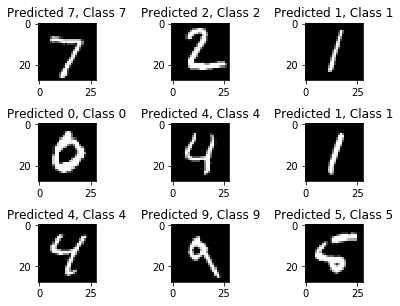

In [18]:
#plotting graph of correctly predicted test data
#test=X_test.copy()

plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted[correct], y_test[correct]))
    
    plt.subplots_adjust(left=.125, bottom=.1, right=1, top=1, wspace=0.2, hspace=0.75)
    
plt.show()


Plotting the images of correct prediction; predicted class and actual class.

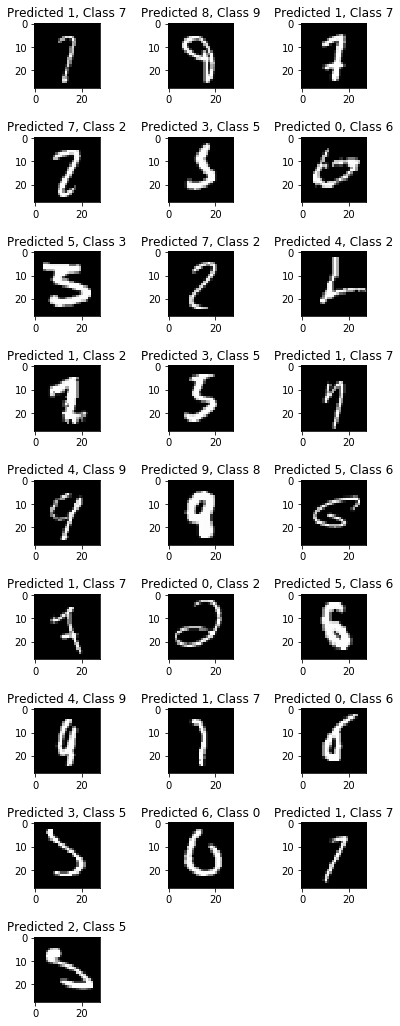

In [19]:
#plotting graph of incorrectly predicted test data
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:25]):

    plt.subplot(9,3,i+1)
    plt.imshow(test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted[incorrect], y_test[incorrect]))
    
    plt.subplots_adjust(left=.125, bottom=.1, right=1, top=3.5, wspace=0.2, hspace=0.75)
    #plt.title("Class {}".format(y_test[incorrect]))
plt.show()

Plotting the images of incorrect prediction; predicted class and actual class.

In [0]:
#print(predicted[correct])

#print(predicted[incorrect], y_test[incorrect])

#print(predicted[:1])

print((predicted)[2])

1
